# Linear Regression Error and Accuracy Metrics

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

In [2]:
from pathlib import Path

csvpath = Path('../10.3/Resources/weather_data_austin_2010.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [3]:
df = df.loc['2010 May':'2010 Jul']
df.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-05-01 00:00:00,67.6,60.9,1.0
2010-05-01 01:00:00,66.4,61.0,1.0
2010-05-01 02:00:00,65.6,60.6,1.0
2010-05-01 03:00:00,65.0,60.4,1.0
2010-05-01 04:00:00,64.7,60.4,1.0


<AxesSubplot:xlabel='Date'>

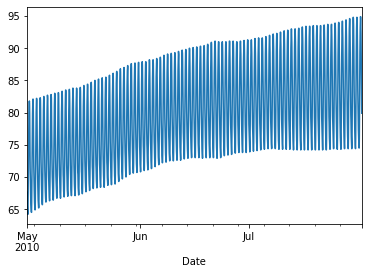

In [4]:
df['Temperature'].plot()

# Set Features (X) and Target (y)

In this example, we want to use the week of the year to predict the temperature

In [5]:
# Create a DataFrame of the input features (X)
# Export the Temperature column as a DataFrame
X = df['Temperature'].to_frame()
print(f"X has {X.shape[0]} rows and {X.shape[1]} column of data.")
X.head()

X has 2208 rows and 1 column of data.


,Temperature
Date,
2010-05-01 00:00:00,67.6
2010-05-01 01:00:00,66.4
2010-05-01 02:00:00,65.6
2010-05-01 03:00:00,65.0
2010-05-01 04:00:00,64.7


In [6]:
# Generate a column with the week of the year
X['Week_of_Year'] = X.index.weekofyear
X.head()

<ipython-input-6-0d8505e88685>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  X['Week_of_Year'] = X.index.weekofyear


,Temperature,Week_of_Year
Date,,
2010-05-01 00:00:00,67.6,17
2010-05-01 01:00:00,66.4,17
2010-05-01 02:00:00,65.6,17
2010-05-01 03:00:00,65.0,17
2010-05-01 04:00:00,64.7,17


In [7]:
# Binary encode the weekly column to use as new input features for the model
X_binary_encoded = pd.get_dummies(X, columns=['Week_of_Year'])
X_binary_encoded.head()

,Temperature,Week_of_Year_17,Week_of_Year_18,Week_of_Year_19,Week_of_Year_20,Week_of_Year_21,Week_of_Year_22,Week_of_Year_23,Week_of_Year_24,Week_of_Year_25,Week_of_Year_26,Week_of_Year_27,Week_of_Year_28,Week_of_Year_29,Week_of_Year_30
Date,,,,,,,,,,,,,,,
2010-05-01 00:00:00,67.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-05-01 01:00:00,66.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-05-01 02:00:00,65.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-05-01 03:00:00,65.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-05-01 04:00:00,64.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# The target Temperature column must be deleted from the input features
X_binary_encoded = X_binary_encoded.drop('Temperature', axis=1)
X_binary_encoded.head()

,Week_of_Year_17,Week_of_Year_18,Week_of_Year_19,Week_of_Year_20,Week_of_Year_21,Week_of_Year_22,Week_of_Year_23,Week_of_Year_24,Week_of_Year_25,Week_of_Year_26,Week_of_Year_27,Week_of_Year_28,Week_of_Year_29,Week_of_Year_30
Date,,,,,,,,,,,,,,
2010-05-01 00:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-05-01 01:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-05-01 02:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-05-01 03:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-05-01 04:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# The target for our model is to predict the Temperature
y = df['Temperature'].copy()

# Linear Regression

In [10]:
# Create the Linear Regression model
model = LinearRegression()

# Fit the model to the data (Train the model)
model.fit(X_binary_encoded, y)

# Predict the temperature using the week of the year as inputs
predictions = model.predict(X_binary_encoded)

# Evaluating the Model

In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# The default scoring method is the R2 score
score = model.score(X_binary_encoded, y)
r2 = r2_score(y, predictions)

print(f"Score: {score}, r2: {r2}")

Score: 0.23693486238912465, r2: 0.23693486238912465


In [12]:
# Mean Squared Error
mse = mean_squared_error(y, predictions)
mse

40.71784750109133

In [13]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
rmse

6.381053792367788

In [14]:
# Standard deviation of the temperature
np.std(y)

7.304854998693149

# Plotting the Regression Line

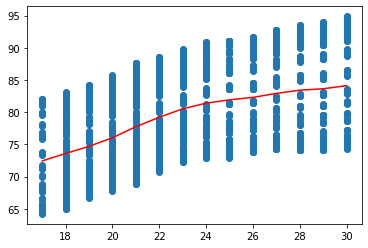

In [15]:
plt.scatter(X['Week_of_Year'], y)
plt.plot(X['Week_of_Year'], predictions, color='red')